In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

#importing warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [ ]:
# reading the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Checking the info and the null values:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 1: Data Cleaning

In [ ]:
# checking the total number of null values:

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
# droppig the unnecessary columns from the dataset which has more than 3000 missing values:

leads.drop(['Tags',
            'Asymmetrique Activity Index',
            'Asymmetrique Profile Index',
            'Asymmetrique Activity Score',
            'Asymmetrique Profile Score',
            'Lead Quality'], axis = 1, inplace = True)


In [ ]:
# checking the null values again:

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [ ]:
# checking value counts of Country column
leads['Country'].value_counts(dropna=False)
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
# dropping the country column and city column as majority of values are single category:

leads.drop(['Country','City'], axis = 1, inplace = True)

In [ ]:
# cheking the null columns again:

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [ ]:
# cheking the value counts of all columns:
col = ['How did you hear about X Education',
       'What is your current occupation' ,
       'What matters most to you in choosing a course',
        'Lead Source',
        'Specialization',
        'Last Activity',
        'Lead Profile']

#checking the individual values from the columns:

for i in col:
    print(leads[i].value_counts(dropna = False))
    print('\n')

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      

In [ ]:
# dropping the columns How did you hear about X Education, What matters most to you in choosing a course and lead profile :


leads.drop(['How did you hear about X Education',
            'What matters most to you in choosing a course',
            'Lead Profile'], axis = 1, inplace = True)

In [ ]:
# cheking the null values once again:

leads.isnull().sum().sort_values(ascending=False)

What is your current occupation             2690
Specialization                              1438
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
X Education Forums                             0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
Search                                         0
Newspaper Article                              0
Magazine                                       0
Lead Number                                    0
Total Time Spent on 

In [ ]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [ ]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                 130
Page Views Per Visit                        130
Last Activity                               103
Lead Source                                  36
Specialization                               18
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Search                                        0
Newspaper Article                             0
Magazine                                      0
Lead Number                                   0
What is your current occupation               0
Total Time Spent on Website             

In [ ]:
# again cheking the count values of columns having null values:

col1 = ['TotalVisits' ,
        'Page Views Per Visit',
        'Last Activity',
        'Lead Source',
        'Specialization']
#checking the individual values from the columns:

for i in col1:
    print(leads[i].value_counts(dropna = False))
    print('\n')

0.0      1375
2.0      1228
3.0       940
4.0       825
5.0       578
6.0       337
1.0       270
7.0       225
8.0       163
NaN       130
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
21.0        5
23.0        5
27.0        5
25.0        3
24.0        3
22.0        3
29.0        2
26.0        2
55.0        1
30.0        1
43.0        1
74.0        1
115.0       1
251.0       1
32.0        1
28.0        1
42.0        1
Name: TotalVisits, dtype: int64


0.00     1375
2.00     1329
3.00      875
4.00      660
1.00      433
         ... 
2.56        1
4.75        1
16.00       1
6.33        1
2.08        1
Name: Page Views Per Visit, Length: 108, dtype: int64


Email Opened                    2460
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced            

In [ ]:
# dropping the null values of totalvisits column:

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [ ]:
# cheking the null values again:
leads.isnull().sum().sort_values(ascending=False)

Lead Source                                 29
Specialization                              18
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted    

In [ ]:
# dropping the null values of specialization :


leads = leads[~pd.isnull(leads['Specialization'])]

In [ ]:
# cheking the null values again:
leads.isnull().sum().sort_values(ascending=False)

Lead Source                                 29
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Specialization                               0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted    

In [ ]:
# dropping the null values of Lead Source :


leads = leads[~pd.isnull(leads['Lead Source'])]

In [ ]:
# cheking the null values again:
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                       

In [ ]:
# dropping columns which are not relevant to analysis:



In [ ]:

# Treating the misprinted word in the column lead source (ex: google as Google)

leads['Lead Source'] = leads['Lead Source'].apply(lambda x:x.capitalize())
leads['Lead Source'].value_counts()

Google               2048
Direct traffic       1873
Olark chat            892
Organic search        870
Reference             443
Welingak website      129
Referral sites         75
Facebook               28
Click2call              4
Bing                    3
Social media            2
Live chat               2
Pay per click ads       1
Welearn                 1
Testone                 1
Press_release           1
Name: Lead Source, dtype: int64

## Data Transformation

In [ ]:
# converting the categorical columns having yes and no to yes --> 1 and no ---> 0

category = {'Yes':1,
            'No':0
           }

# Do not Email column :
leads['Do Not Email'] = leads['Do Not Email'].map(category)

# Do Not Call column:
leads['Do Not Call'] = leads['Do Not Call'].map(category)

# Search column
leads['Search'] = leads['Search'].map(category)

# Magazine column
leads['Magazine'] = leads['Magazine'].map(category)



# Newspaper Article column
leads['Newspaper Article'] = leads['Newspaper Article'].map(category)

# X Education Forums column:
leads['X Education Forums'] = leads['X Education Forums'].map(category)

# Newspaper column:
leads['Newspaper'] = leads['Newspaper'].map(category)

# Digital Advertisement column:
leads['Digital Advertisement'] = leads['Digital Advertisement'].map(category)

# Through Recommendations column:
leads['Through Recommendations'] = leads['Through Recommendations'].map(category)

# Receive More Updates About Our Courses column:
leads['Receive More Updates About Our Courses'] = leads['Receive More Updates About Our Courses'].map(category)

# Update me on Supply Chain Content column:
leads['Update me on Supply Chain Content'] = leads['Update me on Supply Chain Content'].map(category)

# Get updates on DM Content column:
leads['Get updates on DM Content'] = leads['Get updates on DM Content'].map(category)

# I agree to pay the amount through cheque column:
leads['I agree to pay the amount through cheque'] = leads['I agree to pay the amount through cheque'].map(category)

# A free copy of Mastering The Interview cokumn:

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map(category)


In [ ]:
# checking the dataset:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


## Visualize The Data

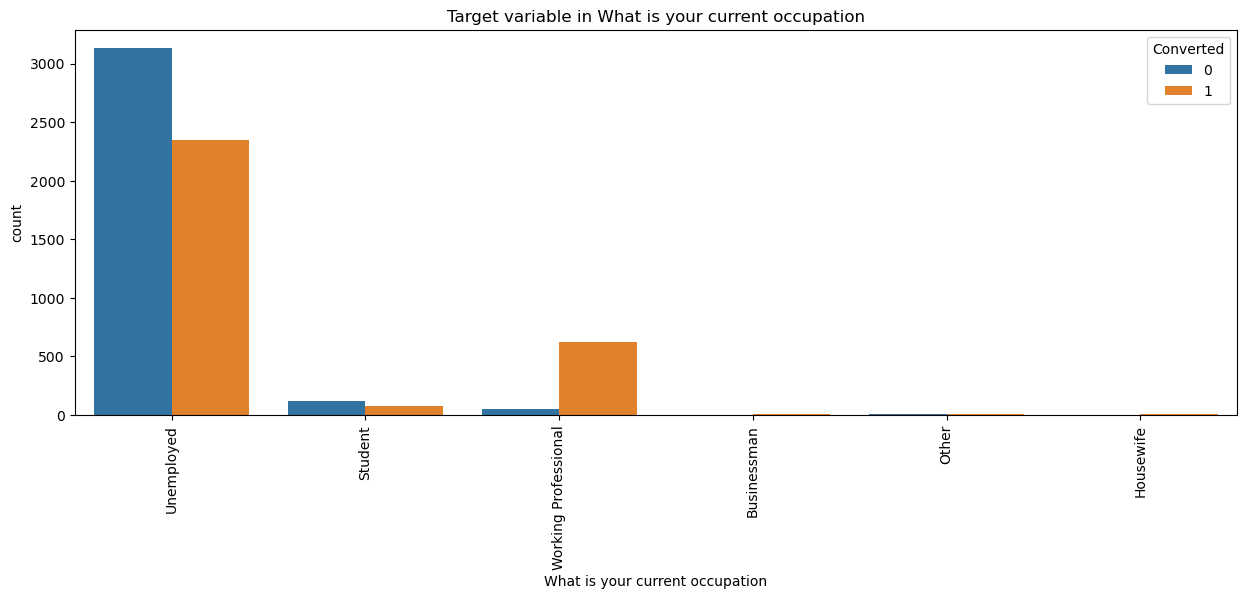

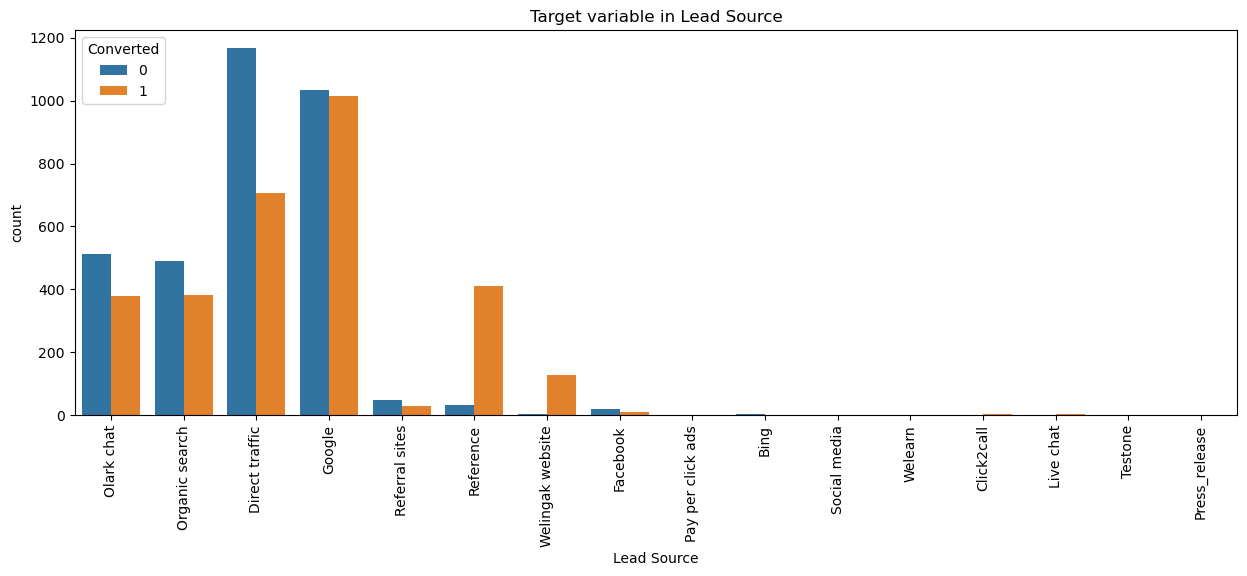

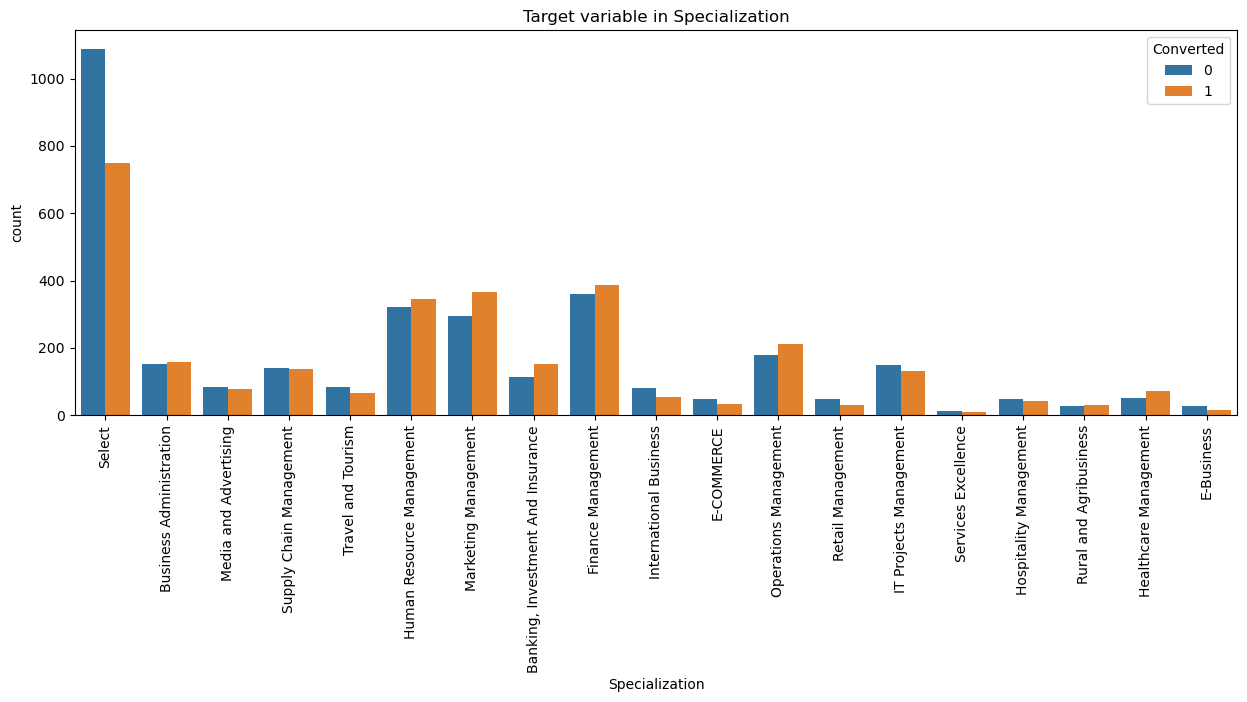

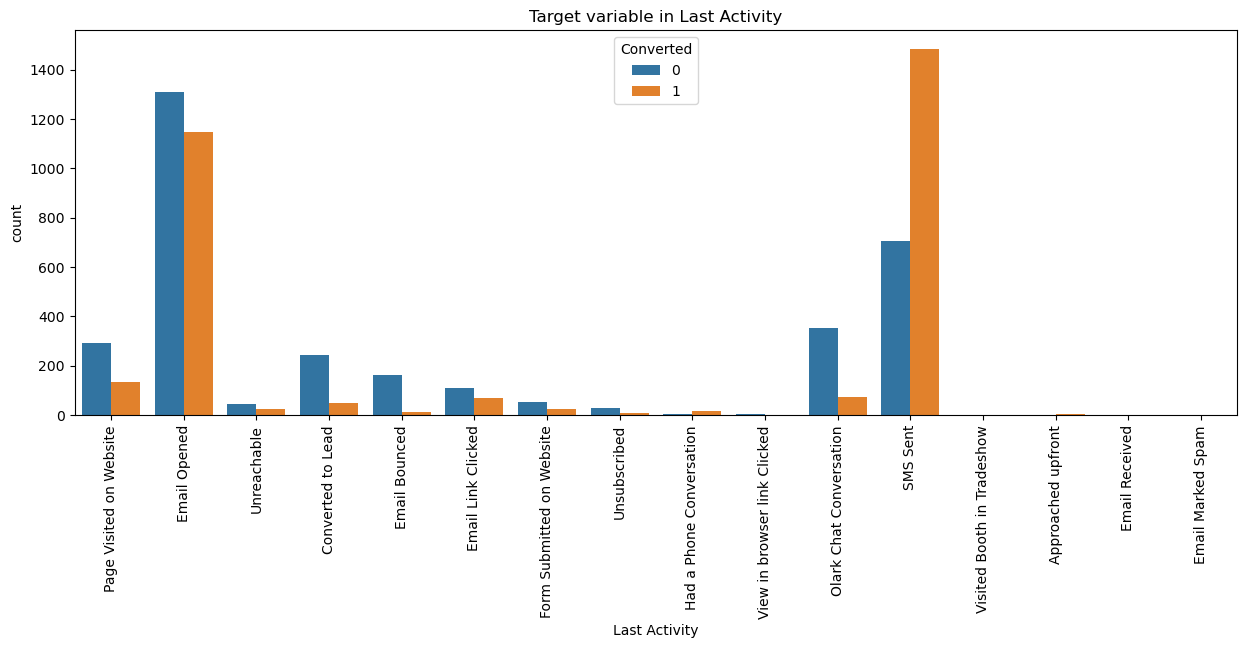

In [ ]:
# countplotting the categorical columns to get a better observations:

col2 = [
       'What is your current occupation' ,
        'Lead Source',
        'Specialization',
        'Last Activity',
        ]
for i in col2:
    plt.figure(figsize =(15,5))
    sns.countplot(leads[i], hue=leads.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

## Creating the dummy variables:

In [ ]:
# creating the dummy variables:


dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)


In [ ]:
# checking the dummy dataset:

dummy.head()

,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# merging the dummy dataset with the original dataset:

leads = pd.concat([leads, dummy], axis=1)

In [ ]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity',
                   'Prospect ID'], 1)

In [ ]:
# cheking the dataset:

leads.head()

,Lead Number,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Splitting into Train & Test Dataset:

In [ ]:
# separating target variables:

y = leads['Converted']

y.head()

X = leads.drop(['Converted'], 1)
X.head()

,Lead Number,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,660727,0,2.0,1532,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Spliting the dataset into 70% train dataset and 30% test dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# cheking the shape of train dataset:

print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 67)
y_train Size (4461,)


## Scaling:


In [ ]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.describe()

,Lead Number,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4461.000000,4461.000000,4461.000000,4.461000e+03,4461.000000,4461.000000,4461.0,4461.0,4461.0,4461.000000,...,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,616277.475006,0.000224,3.646492,1.523850e-16,2.457664,0.001569,0.0,0.0,0.0,0.000224,...,0.322349,0.0,0.002242,0.305089,0.011432,0.033849,0.288725,0.003587,0.005380,0.000224
std,23305.140877,0.014972,5.449720,1.000112e+00,2.046555,0.039586,0.0,0.0,0.0,0.014972,...,0.467428,0.0,0.047298,0.460497,0.106321,0.180860,0.453220,0.059788,0.073159,0.014972
min,579533.000000,0.000000,0.000000,-9.430217e-01,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596064.000000,0.000000,1.000000,-8.845936e-01,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,613825.000000,0.000000,3.000000,-4.384149e-01,2.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,636930.000000,0.000000,5.000000,8.611688e-01,3.670000,0.000000,0.0,0.0,0.0,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,251.000000,3.079668e+00,16.000000,1.000000,0.0,0.0,0.0,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 48.09


#### Correlation in the dataset

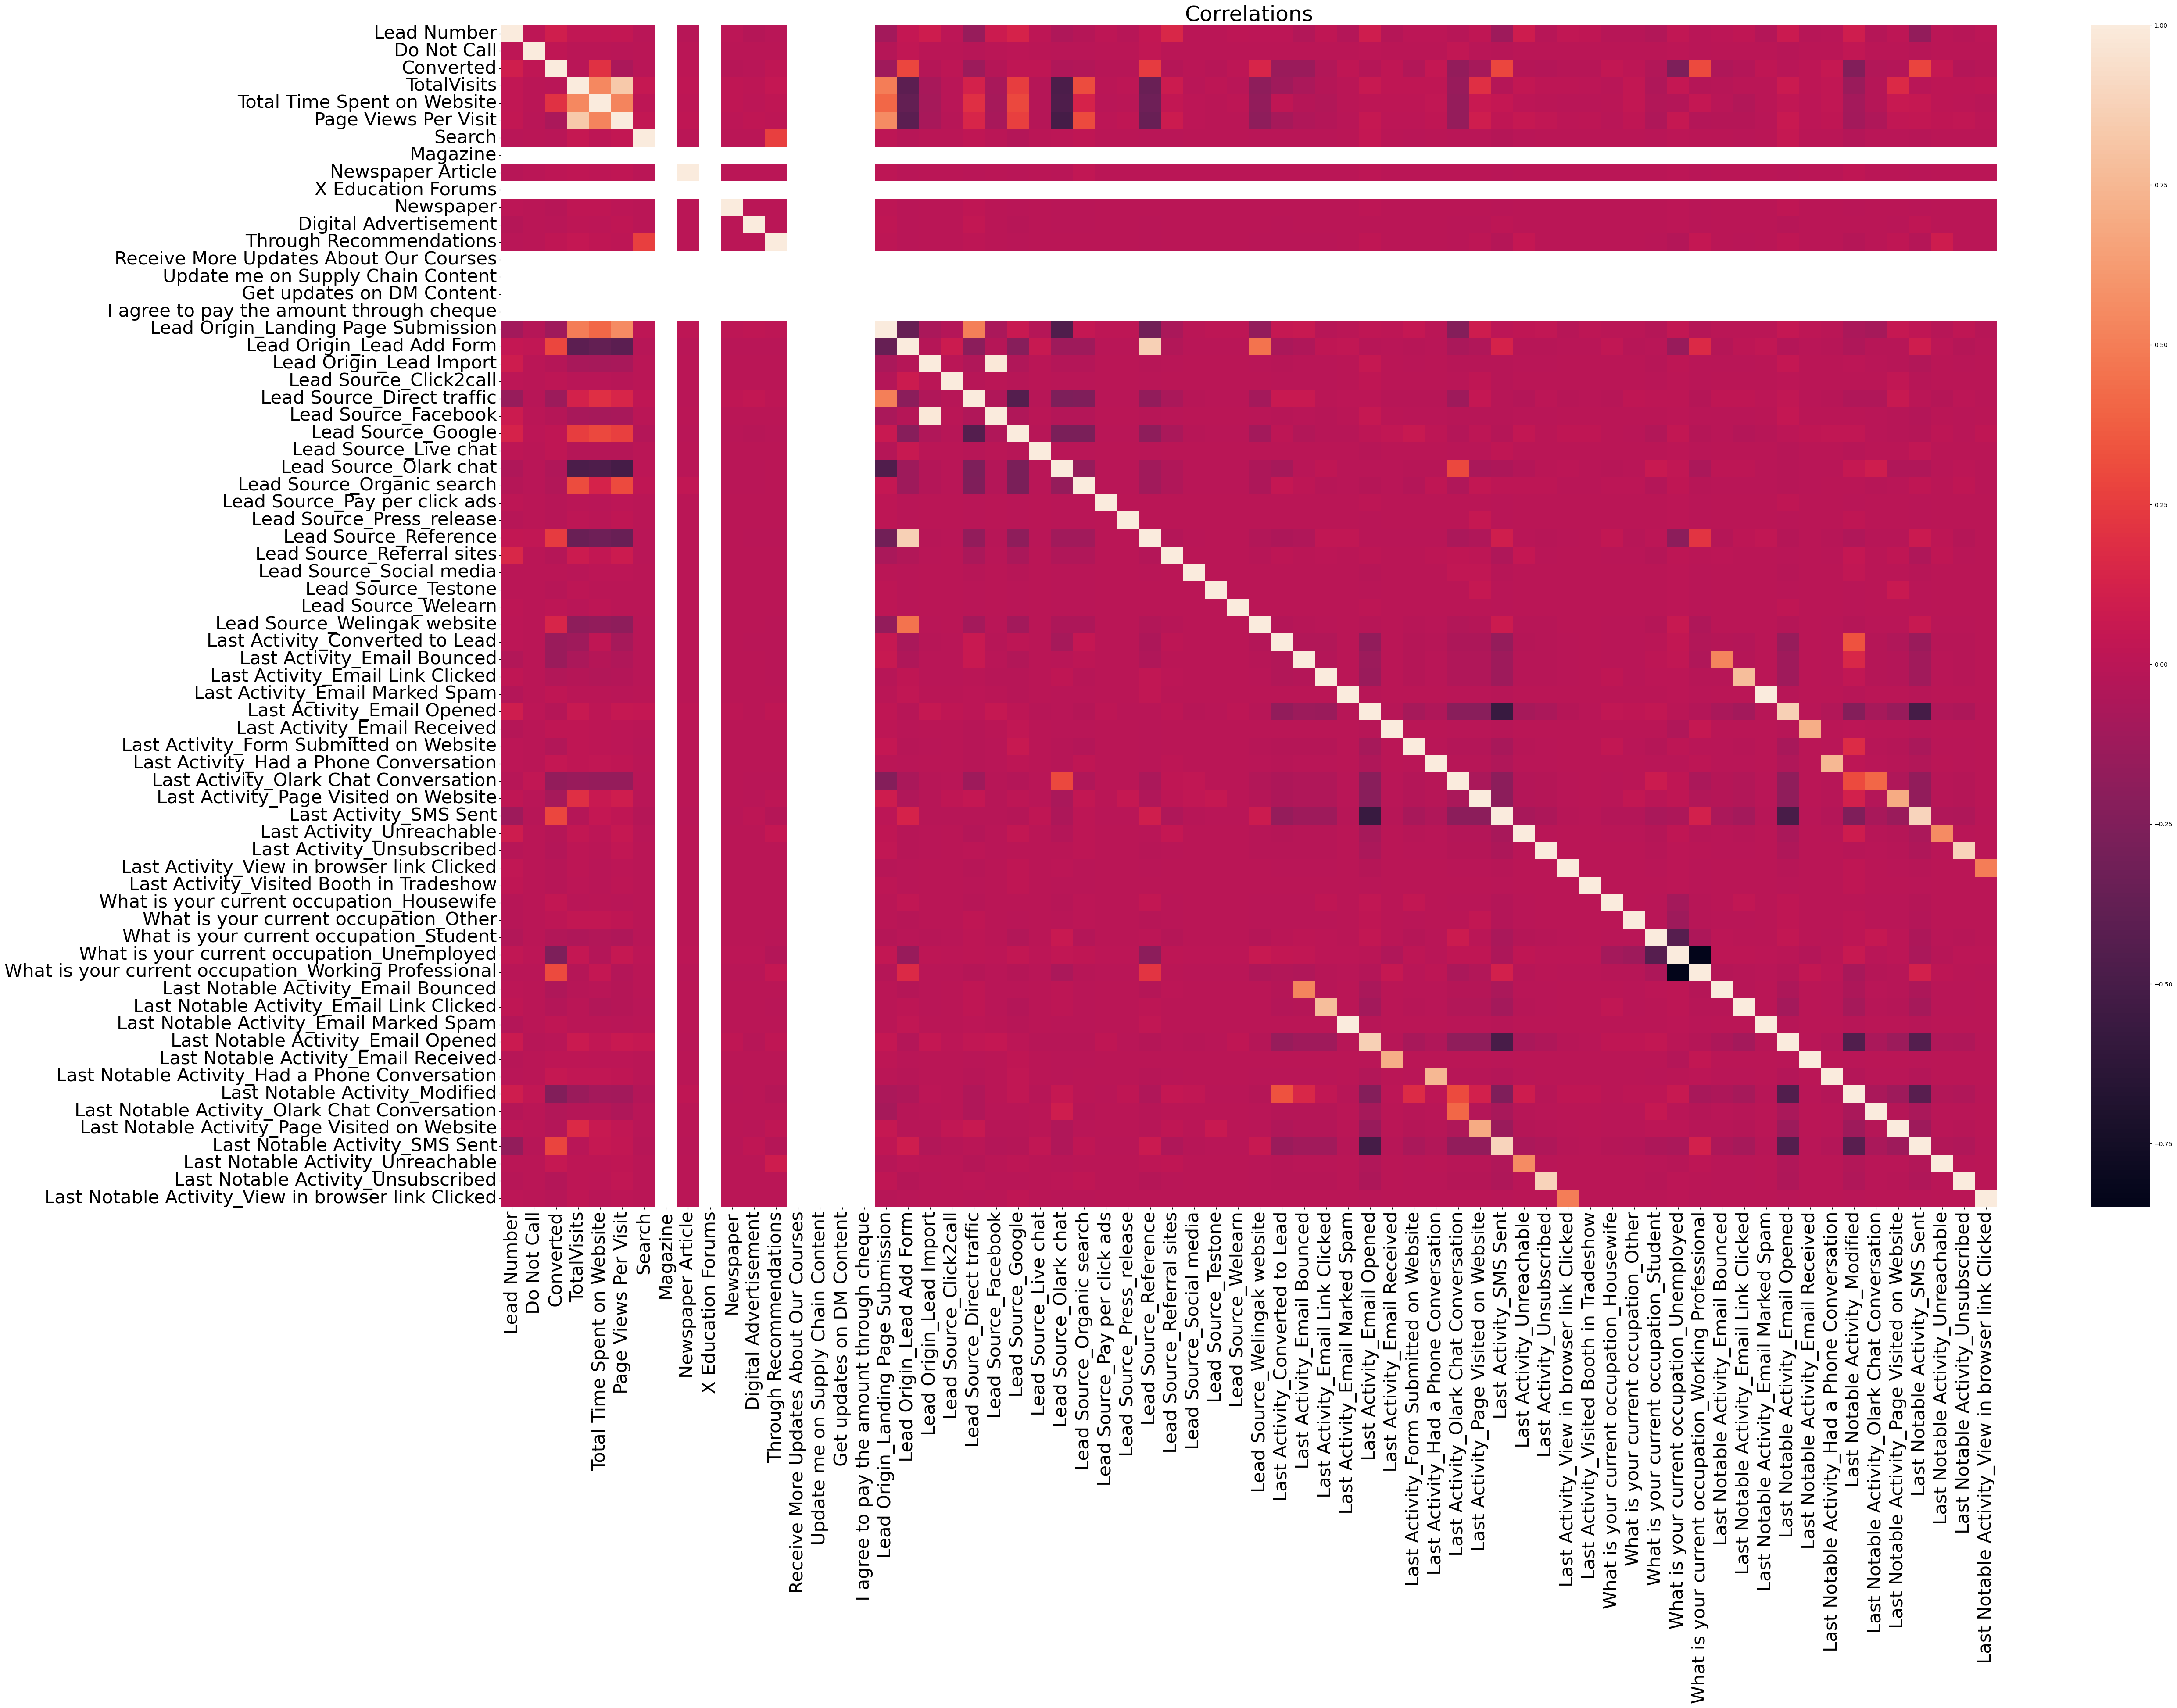

In [ ]:
# setting the figure size
plt.figure(figsize=(55,35))

# Plotting a heatmap

sns.heatmap(leads.corr(method='spearman'))
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

Correlation is shown above by heatmap, from above we couldn't find much which features are highly correlated and to drop thus we will now proceed with building our model and based on the p-values and VIFs, we will again check for correlation.

# Building a Model

We are going to use hybrid model creation using RFE and manual features selection

### feature selection using RFE


In [ ]:
logreg = LogisticRegression()
# RFE model with 15 variables

rfe = RFE(logreg, n_features_to_select=15)

# fitting the model

rfe = rfe.fit(X_train,y_train)

In [ ]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 31),
 ('Magazine', False, 43),
 ('Newspaper Article', False, 44),
 ('X Education Forums', False, 45),
 ('Newspaper', False, 40),
 ('Digital Advertisement', False, 36),
 ('Through Recommendations', False, 28),
 ('Receive More Updates About Our Courses', False, 53),
 ('Update me on Supply Chain Content', False, 52),
 ('Get updates on DM Content', False, 50),
 ('I agree to pay the amount through cheque', False, 46),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Click2call', False, 38),
 ('Lead Source_Direct traffic', True, 1),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live chat', False, 29),
 ('Lead Source_Olark chat', False, 4),
 ('Lead Source_Organic search', Fal

In [ ]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'Lead Origin_Lead Import',
       'Lead Source_Click2call', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Live chat', 'Lead Source_Olark chat',
       'Lead Source_Organic search', 'Lead Source_Pay per click ads',
       'Lead Source_Press_release', 'Lead Source_Referral sites',
       'Lead Source_Social media', 'Lead Source_Testone',
       'Lead Source_Welearn', 'Lead Source_Welingak website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Co

In [ ]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Lead Number,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct traffic,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
8003,588514,-0.824395,2.0,1,0,1,0,0,0,0,1,1,0,0,1
218,658206,-0.611929,4.0,1,0,1,0,0,0,0,0,1,0,1,0
4171,619890,-0.804919,6.0,1,0,1,0,0,0,0,0,1,0,1,0
4037,621270,-0.943022,0.0,0,0,0,0,0,0,0,0,1,0,0,0
3660,625185,-0.943022,0.0,0,1,0,1,0,0,0,1,1,0,0,1


**Model 1**

In [ ]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()                                                       #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2044.3
Date:                Mon, 20 Nov 2023   Deviance:                       4088.6
Time:                        23:08:13   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.5693      1.094     -6.922      0.000      -9.713      -5.426
Lead Number                                           1.346e-05   1.75e-06      7.679      0.000       1e-05    1.69e-05
Total Time Spent on Website                              1.0030      0.044     22.926      0.000       0.917       1.089
Page Views Per Visit                                    -0.1251      0.023     -5.356      0.000      -0.171      -0.079
Lead Origin_Landing Page Submission                     -0.3220      0.104     -3.084      0.002      -0.527      -0.117
Lead Origin_Lead Add Form                                4.3923      0.723      6.078      0.000       2.976       5.809
Lead Source_Direct traffic                              -0.4779      0.100     -4.792      0.000      -0.673      -0.282
Lead Source_Reference                                   -1.4173      0.761     -1.863      0.062      -2.909       0.074
Last Activity_Converted to Lead                         -0.8111      0.236     -3.442      0.001      -1.273      -0.349
Last Activity_Email Bounced                             -1.7000      0.368     -4.616      0.000      -2.422      -0.978
Last Activity_Olark Chat Conversation                   -0.7084      0.196     -3.610      0.000      -1.093      -0.324
Last Activity_SMS Sent                                   0.3878      0.198      1.959      0.050   -9.44e-05       0.776
What is your current occupation_Unemployed              -0.6550      0.205     -3.199      0.001      -1.056      -0.254
What is your current occupation_Working Professional     2.0068      0.280      7.170      0.000       1.458       2.555
Last Notable Activity_Modified                          -0.6278      0.114     -5.516      0.000      -0.851      -0.405
Last Notable Activity_SMS Sent                           0.7275      0.219      3.318      0.001       0.298       1.157
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features having insignificant values one by one and create new models until all the features attain significant p-value<0.05 and vif-values < 4.

#### Calculating VIF

In [ ]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe[rfe_col].columns

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead Number,32.32
11,What is your current occupation_Unemployed,25.79
14,Last Notable Activity_SMS Sent,9.27
10,Last Activity_SMS Sent,9.11
4,Lead Origin_Lead Add Form,4.71
3,Lead Origin_Landing Page Submission,4.41
6,Lead Source_Reference,4.31
12,What is your current occupation_Working Profes...,4.05
2,Page Views Per Visit,3.73
13,Last Notable Activity_Modified,2.67


**Model 2**

- for this we are dropping 'Lead Source_Reference','Last Notable Activity_SMS Sent' due to high p-value

In [ ]:
# Dropping the most insignificant values 'Lead Source_Reference' and 'Last Notable Activity_SMS Sent'

X_train_rfe2 = X_train_1.drop(['Lead Source_Reference','Last Notable Activity_SMS Sent'],1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.1
Date:                Mon, 20 Nov 2023   Deviance:                       4104.2
Time:                        23:08:15   Pearson chi2:                 4.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.1047      1.083     -6.561      0.000      -9.227      -4.982
Lead Number                                           1.275e-05   1.74e-06      7.343      0.000    9.35e-06    1.62e-05
Total Time Spent on Website                              1.0005      0.044     22.896      0.000       0.915       1.086
Page Views Per Visit                                    -0.1231      0.023     -5.292      0.000      -0.169      -0.078
Lead Origin_Landing Page Submission                     -0.3224      0.104     -3.094      0.002      -0.527      -0.118
Lead Origin_Lead Add Form                                3.2270      0.249     12.984      0.000       2.740       3.714
Lead Source_Direct traffic                              -0.4794      0.099     -4.819      0.000      -0.674      -0.284
Last Activity_Converted to Lead                         -0.6531      0.231     -2.822      0.005      -1.107      -0.199
Last Activity_Email Bounced                             -1.6431      0.369     -4.448      0.000      -2.367      -0.919
Last Activity_Olark Chat Conversation                   -0.6042      0.195     -3.101      0.002      -0.986      -0.222
Last Activity_SMS Sent                                   0.9805      0.087     11.334      0.000       0.811       1.150
What is your current occupation_Unemployed              -0.6353      0.205     -3.096      0.002      -1.037      -0.233
What is your current occupation_Working Professional     2.0271      0.281      7.222      0.000       1.477       2.577
Last Notable Activity_Modified                          -0.8280      0.099     -8.382      0.000      -1.022      -0.634
========================================================================================================================
"""

In [ ]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,784.35
12,What is your current occupation_Working Profes...,3.68
11,What is your current occupation_Unemployed,3.62
4,Lead Origin_Landing Page Submission,1.94
3,Page Views Per Visit,1.53
6,Lead Source_Direct traffic,1.42
5,Lead Origin_Lead Add Form,1.37
13,Last Notable Activity_Modified,1.37
9,Last Activity_Olark Chat Conversation,1.27
7,Last Activity_Converted to Lead,1.23


**Model 3**

- for this we are dropping 'const' as it has very high VIF value

In [ ]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_2.drop(['const'],1)

# Creating a new model 3

X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.1
Date:                Mon, 20 Nov 2023   Deviance:                       4104.2
Time:                        23:08:15   Pearson chi2:                 4.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.1047      1.083     -6.561      0.000      -9.227      -4.982
Lead Number                                           1.275e-05   1.74e-06      7.343      0.000    9.35e-06    1.62e-05
Total Time Spent on Website                              1.0005      0.044     22.896      0.000       0.915       1.086
Page Views Per Visit                                    -0.1231      0.023     -5.292      0.000      -0.169      -0.078
Lead Origin_Landing Page Submission                     -0.3224      0.104     -3.094      0.002      -0.527      -0.118
Lead Origin_Lead Add Form                                3.2270      0.249     12.984      0.000       2.740       3.714
Lead Source_Direct traffic                              -0.4794      0.099     -4.819      0.000      -0.674      -0.284
Last Activity_Converted to Lead                         -0.6531      0.231     -2.822      0.005      -1.107      -0.199
Last Activity_Email Bounced                             -1.6431      0.369     -4.448      0.000      -2.367      -0.919
Last Activity_Olark Chat Conversation                   -0.6042      0.195     -3.101      0.002      -0.986      -0.222
Last Activity_SMS Sent                                   0.9805      0.087     11.334      0.000       0.811       1.150
What is your current occupation_Unemployed              -0.6353      0.205     -3.096      0.002      -1.037      -0.233
What is your current occupation_Working Professional     2.0271      0.281      7.222      0.000       1.477       2.577
Last Notable Activity_Modified                          -0.8280      0.099     -8.382      0.000      -1.022      -0.634
========================================================================================================================
"""

In [ ]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead Number,32.26
10,What is your current occupation_Unemployed,25.76
3,Lead Origin_Landing Page Submission,4.41
11,What is your current occupation_Working Profes...,4.03
2,Page Views Per Visit,3.73
5,Lead Source_Direct traffic,1.97
12,Last Notable Activity_Modified,1.95
9,Last Activity_SMS Sent,1.71
4,Lead Origin_Lead Add Form,1.51
8,Last Activity_Olark Chat Conversation,1.33


**Model 4**

- for this we are dropping 'Lead Number' as it has very high VIF value

In [ ]:
# Dropping the most insignificant values 'Lead Number'

X_train_rfe4 = X_train_3.drop(['Lead Number'],1)

# Creating a new model 4

X_train_4=sm.add_constant(X_train_rfe4)                                 # Adding constant
logr4=sm.GLM(y_train,X_train_4,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr4.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.5
Date:                Mon, 20 Nov 2023   Deviance:                       4158.9
Time:                        23:08:16   Pearson chi2:                 4.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7025      0.210      3.341      0.001       0.290       1.115
Total Time Spent on Website                              1.0084      0.043     23.212      0.000       0.923       1.094
Page Views Per Visit                                    -0.1120      0.023     -4.865      0.000      -0.157      -0.067
Lead Origin_Landing Page Submission                     -0.3699      0.104     -3.566      0.000      -0.573      -0.167
Lead Origin_Lead Add Form                                3.2265      0.247     13.074      0.000       2.743       3.710
Lead Source_Direct traffic                              -0.5578      0.099     -5.663      0.000      -0.751      -0.365
Last Activity_Converted to Lead                         -0.6738      0.227     -2.965      0.003      -1.119      -0.228
Last Activity_Email Bounced                             -1.7251      0.372     -4.640      0.000      -2.454      -0.996
Last Activity_Olark Chat Conversation                   -0.7068      0.192     -3.677      0.000      -1.084      -0.330
Last Activity_SMS Sent                                   0.8630      0.084     10.266      0.000       0.698       1.028
What is your current occupation_Unemployed              -0.5313      0.201     -2.638      0.008      -0.926      -0.136
What is your current occupation_Working Professional     2.0733      0.278      7.465      0.000       1.529       2.618
Last Notable Activity_Modified                          -0.7306      0.097     -7.508      0.000      -0.921      -0.540
========================================================================================================================
"""

In [ ]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,33.50
11,What is your current occupation_Working Profes...,3.68
10,What is your current occupation_Unemployed,3.62
3,Lead Origin_Landing Page Submission,1.93
2,Page Views Per Visit,1.52
5,Lead Source_Direct traffic,1.40
4,Lead Origin_Lead Add Form,1.37
12,Last Notable Activity_Modified,1.35
8,Last Activity_Olark Chat Conversation,1.26
6,Last Activity_Converted to Lead,1.23


**Model 5**

- for this we are dropping 'const' as it has very high VIF value

In [ ]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe5 = X_train_4.drop(['const'],1)

# Creating a new model 5

X_train_5=sm.add_constant(X_train_rfe5)                                 # Adding constant
logr5=sm.GLM(y_train,X_train_5,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr5.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.5
Date:                Mon, 20 Nov 2023   Deviance:                       4158.9
Time:                        23:08:17   Pearson chi2:                 4.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7025      0.210      3.341      0.001       0.290       1.115
Total Time Spent on Website                              1.0084      0.043     23.212      0.000       0.923       1.094
Page Views Per Visit                                    -0.1120      0.023     -4.865      0.000      -0.157      -0.067
Lead Origin_Landing Page Submission                     -0.3699      0.104     -3.566      0.000      -0.573      -0.167
Lead Origin_Lead Add Form                                3.2265      0.247     13.074      0.000       2.743       3.710
Lead Source_Direct traffic                              -0.5578      0.099     -5.663      0.000      -0.751      -0.365
Last Activity_Converted to Lead                         -0.6738      0.227     -2.965      0.003      -1.119      -0.228
Last Activity_Email Bounced                             -1.7251      0.372     -4.640      0.000      -2.454      -0.996
Last Activity_Olark Chat Conversation                   -0.7068      0.192     -3.677      0.000      -1.084      -0.330
Last Activity_SMS Sent                                   0.8630      0.084     10.266      0.000       0.698       1.028
What is your current occupation_Unemployed              -0.5313      0.201     -2.638      0.008      -0.926      -0.136
What is your current occupation_Working Professional     2.0733      0.278      7.465      0.000       1.529       2.618
Last Notable Activity_Modified                          -0.7306      0.097     -7.508      0.000      -0.921      -0.540
========================================================================================================================
"""

In [ ]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,4.66
2,Lead Origin_Landing Page Submission,4.36
1,Page Views Per Visit,3.59
4,Lead Source_Direct traffic,1.96
11,Last Notable Activity_Modified,1.93
8,Last Activity_SMS Sent,1.71
10,What is your current occupation_Working Profes...,1.55
3,Lead Origin_Lead Add Form,1.46
7,Last Activity_Olark Chat Conversation,1.31
5,Last Activity_Converted to Lead,1.29


In [ ]:
# checking all the coefficients
logr5.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.226533
What is your current occupation_Working Professional    2.073258
Total Time Spent on Website                             1.008425
Last Activity_SMS Sent                                  0.862991
const                                                   0.702537
Page Views Per Visit                                   -0.112042
Lead Origin_Landing Page Submission                    -0.369938
What is your current occupation_Unemployed             -0.531308
Lead Source_Direct traffic                             -0.557792
Last Activity_Converted to Lead                        -0.673810
Last Activity_Olark Chat Conversation                  -0.706795
Last Notable Activity_Modified                         -0.730567
Last Activity_Email Bounced                            -1.725067
dtype: float64

Now we have good amount of features having significant p-values and VIF-values<4. We will consider model 5 as our final model

### Predicting the train dataset with our final model

In [ ]:
#predicting train dataset with final model

y_train_pred=logr5.predict(X_train_5)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
8003,0,0.279099,8003
218,0,0.072271,218
4171,1,0.048752,4171
4037,1,0.314377,4037
3660,1,0.964763,3660


### ROC Curve Plotting


In [ ]:
# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):

    # Creating roc curve to get true positive rate, false positive rate and threshold

    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )

    # Calculating the auc score(area under the curve)

    auc_score = roc_auc_score( actual, probability )

    # Setting the figure size

    plt.figure(figsize=(15,10))

    # Plotting the roc curve

    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )

    # Plotting the 45% dotted line
    plt.plot([0, 1], [0, 1], 'r--')

    # Setting the x axis limit

    plt.xlim([0.0, 1.0])

    # Setting the y axis limit

    plt.ylim([0.0, 1.05])

    # Setting the x axis label
    plt.xlabel('False Positive Rate')

    # Setting the y axis label

    plt.ylabel('True Positive Rate')

    # Setting the title

    plt.title('Receiver operating characteristic')

    # Setting the legend on the left below to show the value of auc

    plt.legend(loc="lower right")

    # Showing the plot

    plt.show()

    return None   # no return

**ROC CURVE**

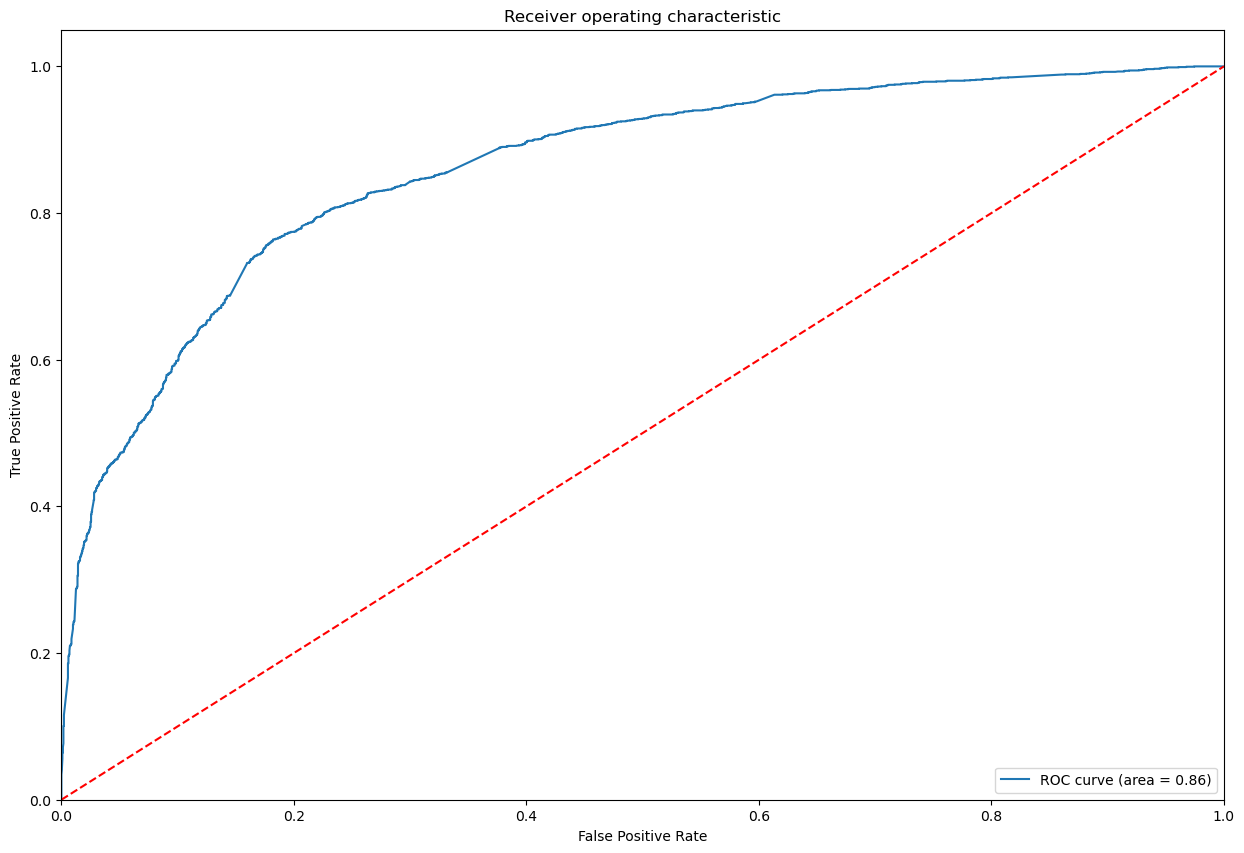

In [ ]:
# Plotting the ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [ ]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.279099,8003,1,1,1,0,0,0,0,0,0,0
218,0,0.072271,218,1,0,0,0,0,0,0,0,0,0
4171,1,0.048752,4171,1,0,0,0,0,0,0,0,0,0
4037,1,0.314377,4037,1,1,1,1,0,0,0,0,0,0
3660,1,0.964763,3660,1,1,1,1,1,1,1,1,1,1


**Accurary, Sensitivity, Specificity**

In [ ]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.481731    1.000000     0.000000
0.1          0.1  0.571397    0.984644     0.187284
0.2          0.2  0.682358    0.942764     0.440311
0.3          0.3  0.743331    0.892973     0.604239
0.4          0.4  0.783457    0.809679     0.759083
0.5          0.5  0.788837    0.743602     0.830882
0.6          0.6  0.761713    0.626803     0.887111
0.7          0.7  0.740417    0.547697     0.919550
0.8          0.8  0.716655    0.457422     0.957612
0.9          0.9  0.661287    0.312238     0.985727


**PLotting Accuracy, Sensitivity and Specificity**

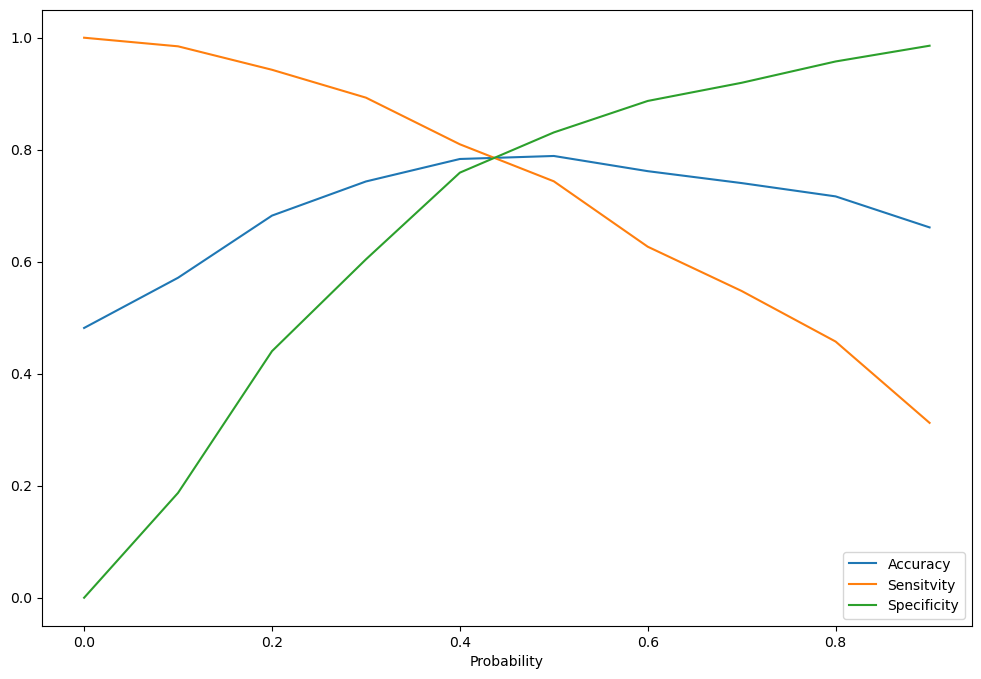

In [ ]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [ ]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
8003,0,0.279099,8003,1,1,1,0,0,0,0,0,0,0,0
218,0,0.072271,218,1,0,0,0,0,0,0,0,0,0,0
4171,1,0.048752,4171,1,0,0,0,0,0,0,0,0,0,0
4037,1,0.314377,4037,1,1,1,1,0,0,0,0,0,0,1
3660,1,0.964763,3660,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[1397,  915],
       [ 230, 1919]], dtype=int64)

In [ ]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)

#print both
print('Sensitivity:',Sensitivity_train)
print('Specificity:',Specificity_train)

Sensitivity: 89.3
Specificity: 60.42


In [ ]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train)
print('Recall:',Recall_train)

Precision: 67.71
Recall: 89.3


In [ ]:
# Checking accuracy for train dataset
Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 74.33


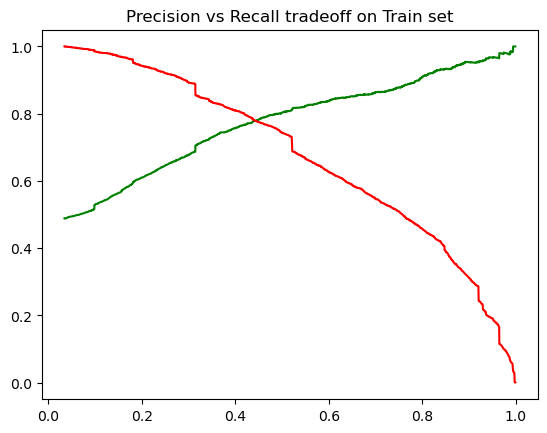

In [ ]:
# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

------
# Prediction on the test dataset
### Scaling the test dataset

In [ ]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [ ]:
# Predicting the test dataset with our final model

test_cols=X_train_5.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr5.predict(X_test_final)      # Predicting the final test set

In [ ]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4771,1,0.997307,4771
6122,0,0.085183,6122
9202,0,0.722317,9202
6570,1,0.588238,6570
2668,1,0.534428,2668


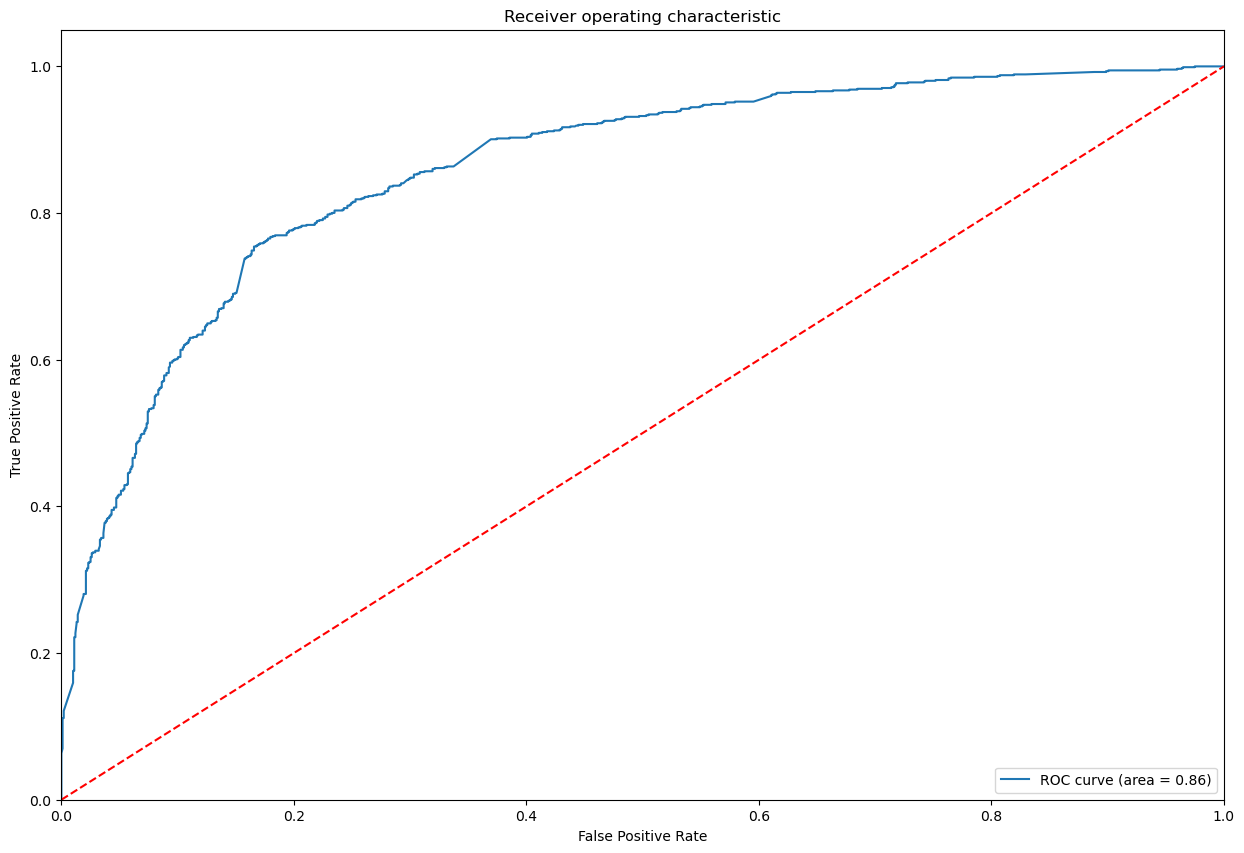

In [ ]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

## Model Evaluation

In [ ]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4771,1,0.997307,4771,1
6122,0,0.085183,6122,0
9202,0,0.722317,9202,1
6570,1,0.588238,6570,1
2668,1,0.534428,2668,1


In [ ]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[603, 393],
       [ 89, 827]], dtype=int64)

In [ ]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)

#print both
print('Sensitivity:',Sensitivity_test)
print('Specificity:',Specificity_test)

Sensitivity: 90.28
Specificity: 60.54


In [ ]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test)
print('Recall:',Recall_test)

Precision: 67.79
Recall: 90.28


In [ ]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 74.79


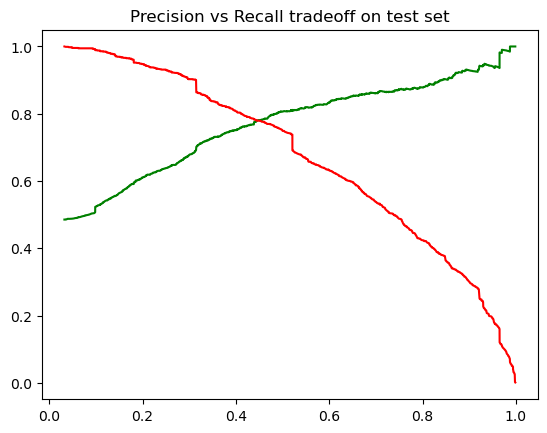

In [ ]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [ ]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  77.43445692883894


### Metrics Comparison between Train data set and Test data set

In [ ]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)
print('Specificity:',Specificity_train)
print('Precision:',Precision_train)
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)
print('Specificity:',Specificity_test)
print('Precision:',Precision_test)
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 89.3
Specificity: 60.42
Precision: 67.71
Recall: 89.3
Accuracy: 74.33

Test Data Set metrics:

Sensitivity: 90.28
Specificity: 60.54
Precision: 67.79
Recall: 90.28
Accuracy: 74.79
